In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
kidney_data = pd.read_csv("kidney_disease.csv")

In [ ]:
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney_data.shape

(400, 26)

In [ ]:
kidney_data['classification'].head(400)

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [ ]:
di_map = {'ckd' :1 , 'notckd':0}
kidney_data['classification'] = kidney_data['classification'].map(di_map)

In [ ]:
kidney_data['classification'].dtypes

dtype('float64')

In [ ]:
kidney_data.isnull().values.any()

True

In [ ]:
kidney_data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      2
dtype: int64

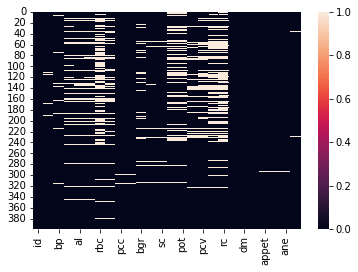

In [ ]:
sns.heatmap(kidney_data.isnull())

In [ ]:
feature_with_na = [features for features in kidney_data.columns if kidney_data[features].isnull().sum()>1]

for feature in feature_with_na:
    print(feature , np.round(kidney_data[feature].isnull().mean() , 4) , '% missing values')

age 0.0225 % missing values
bp 0.03 % missing values
sg 0.1175 % missing values
al 0.115 % missing values
su 0.1225 % missing values
rbc 0.38 % missing values
pc 0.1625 % missing values
pcc 0.01 % missing values
ba 0.01 % missing values
bgr 0.11 % missing values
bu 0.0475 % missing values
sc 0.0425 % missing values
sod 0.2175 % missing values
pot 0.22 % missing values
hemo 0.13 % missing values
pcv 0.175 % missing values
wc 0.2625 % missing values
rc 0.325 % missing values
htn 0.005 % missing values
dm 0.005 % missing values
cad 0.005 % missing values
classification 0.005 % missing values


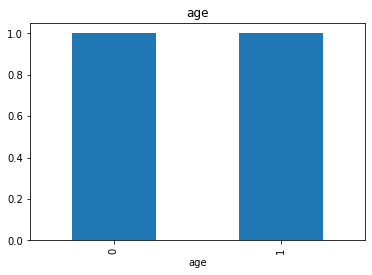

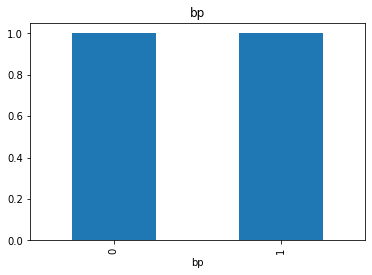

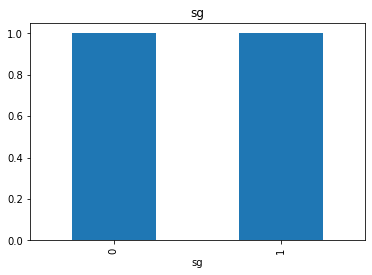

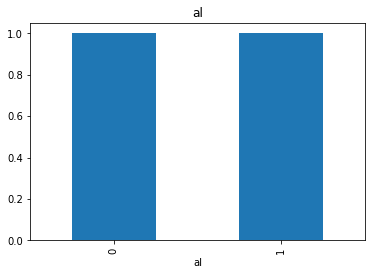

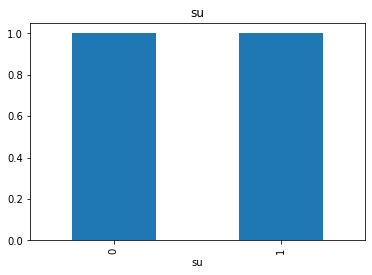

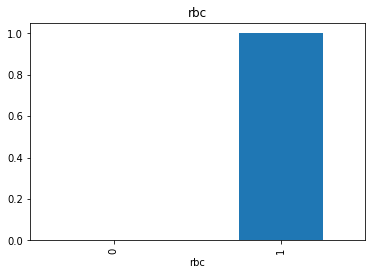

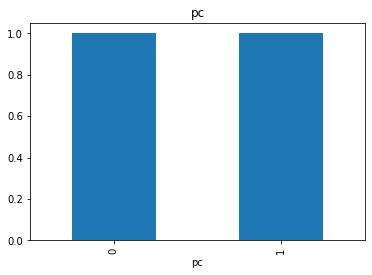

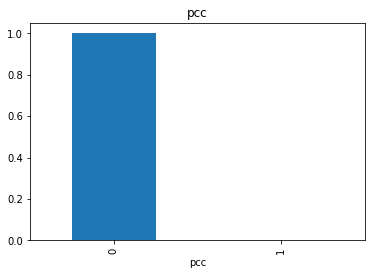

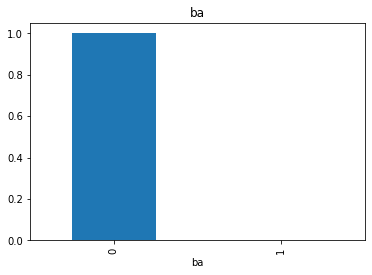

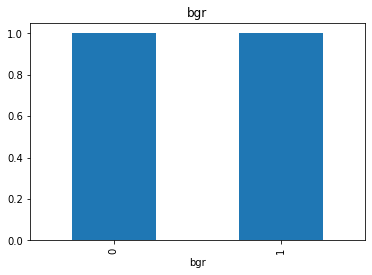

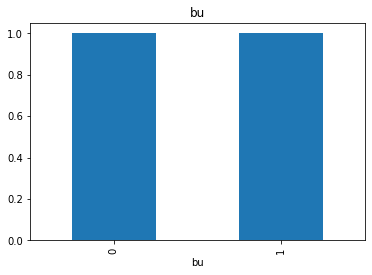

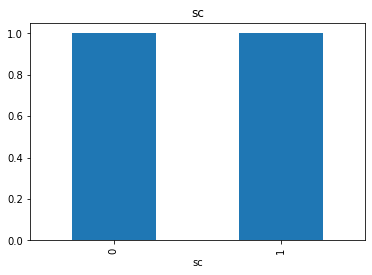

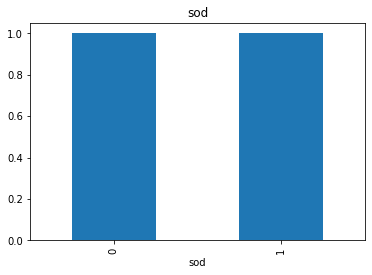

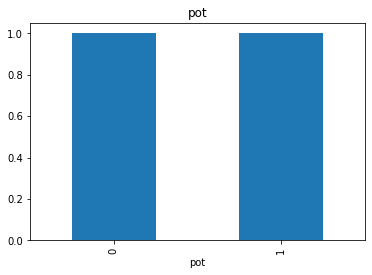

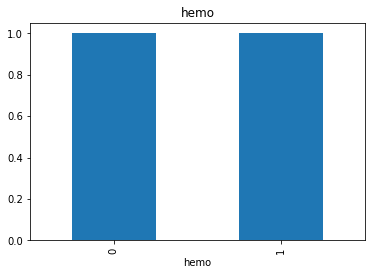

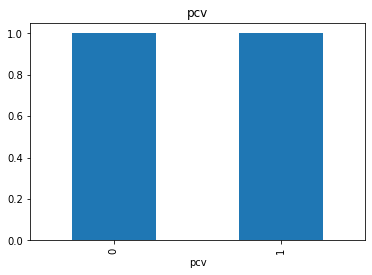

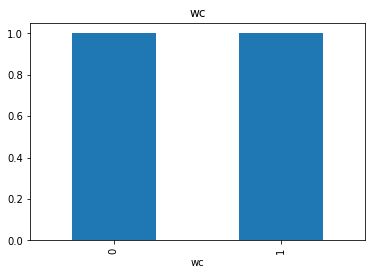

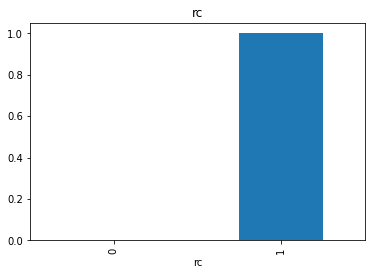

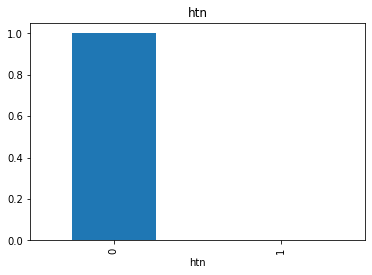

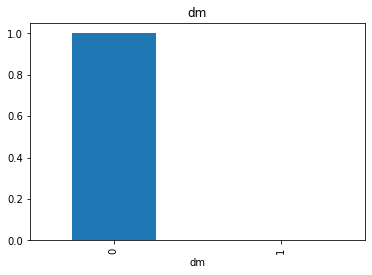

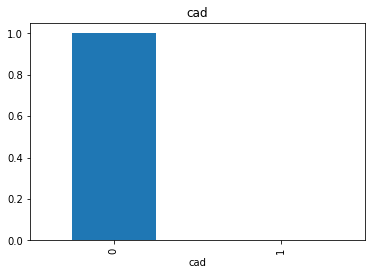

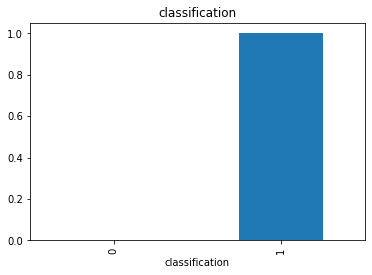

In [ ]:
# there are many missing values so we need do find a relationship between missing values and sales prices
#lets make a variavle 1 if the observation was missing otherwise 0
for feature in feature_with_na:
    data1 = kidney_data.copy()
    
    data1[feature] = np.where(data1[feature].isnull() , 1 , 0)
    
    data1.groupby(feature)['classification'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
kidney_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,398.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.623116
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.485216
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,1.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000


In [ ]:
kidney_data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

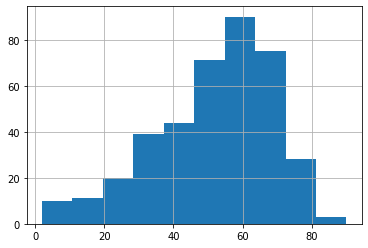

In [ ]:
kidney_data['age'].hist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


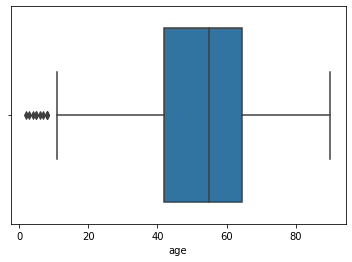

In [ ]:
sns.boxplot(kidney_data['age'])

In [ ]:
grouped_multiple = kidney_data.groupby(['classification']).agg({'age': ['mean', 'min', 'max']})
grouped_multiple.columns = ['age_mean', 'age_min', 'age_max']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

   classification   age_mean  age_min  age_max
0             0.0  46.516779     12.0     80.0
1             1.0  54.425000      2.0     90.0


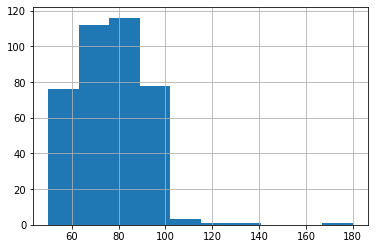

In [ ]:
kidney_data['bp'].hist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


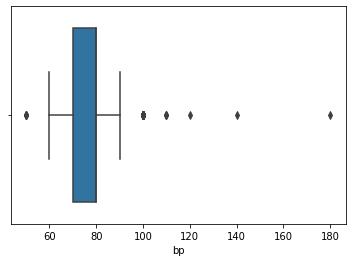

In [ ]:
sns.boxplot(kidney_data['bp'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


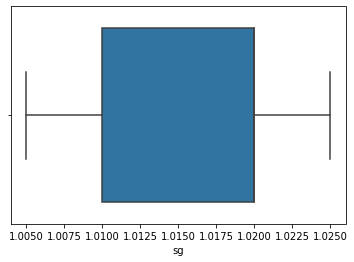

In [ ]:
sns.boxplot(kidney_data['sg'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


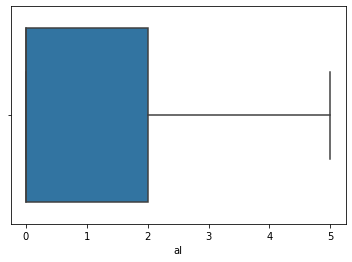

In [ ]:
sns.boxplot(kidney_data['al'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


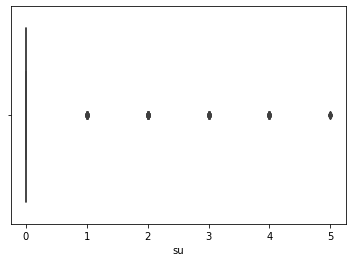

In [ ]:
sns.boxplot(kidney_data['su'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


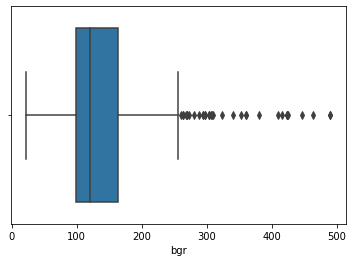

In [ ]:
sns.boxplot(kidney_data['bgr'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


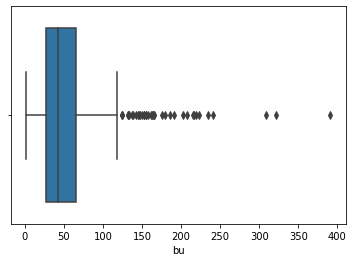

In [ ]:
sns.boxplot(kidney_data['bu'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


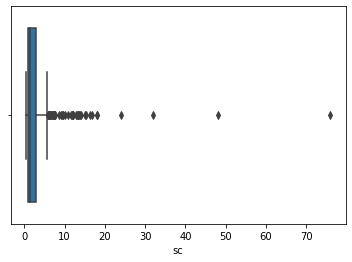

In [ ]:
sns.boxplot(kidney_data['sc'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


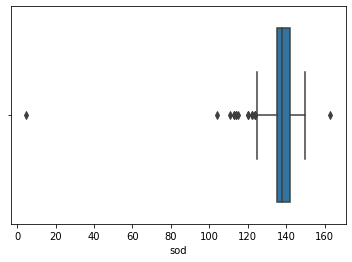

In [ ]:
sns.boxplot(kidney_data['sod'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


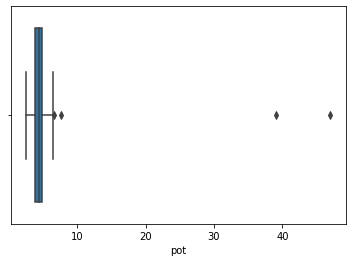

In [ ]:
sns.boxplot(kidney_data['pot'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


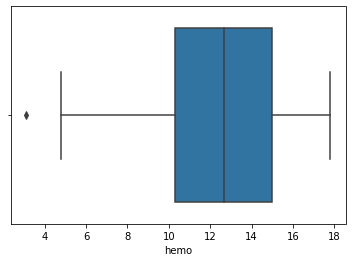

In [ ]:
sns.boxplot(kidney_data['hemo'])

In [ ]:
kidney_data.drop('rbc', axis=1, inplace=True)
kidney_data.drop('rc', axis=1, inplace=True)

In [ ]:
kidney_data.drop('id', axis=1, inplace=True)

In [ ]:
kidney_data['wc'].dtypes

dtype('O')

In [ ]:
kidney_data['wc']

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: wc, Length: 400, dtype: object

In [ ]:
kidney_data['age']= kidney_data['age'].fillna(kidney_data['age'].median())

In [ ]:
kidney_data['bp']= kidney_data['bp'].fillna(kidney_data['bp'].median())
kidney_data['sg']= kidney_data['sg'].fillna(kidney_data['sg'].median())
kidney_data['al']= kidney_data['al'].fillna(kidney_data['al'].mean())
kidney_data['su']= kidney_data['su'].fillna(kidney_data['su'].mode()[0])
kidney_data['pc']= kidney_data['pc'].fillna(kidney_data['pc'].mode()[0])
kidney_data['pcc']= kidney_data['pcc'].fillna(kidney_data['pcc'].mode()[0])
kidney_data['ba']= kidney_data['ba'].fillna(kidney_data['ba'].mode()[0])
kidney_data['bgr']= kidney_data['bgr'].fillna(kidney_data['bgr'].mode()[0])
kidney_data['bu']= kidney_data['bu'].fillna(kidney_data['bu'].mode()[0])
kidney_data['sc']= kidney_data['sc'].fillna(kidney_data['sc'].median())
kidney_data['sod']= kidney_data['sod'].fillna(kidney_data['sod'].median())
kidney_data['pot']= kidney_data['pot'].fillna(kidney_data['pot'].median())
kidney_data['hemo']= kidney_data['hemo'].fillna(kidney_data['hemo'].median())
kidney_data['pcv']= kidney_data['pcv'].fillna(kidney_data['pcv'].mode()[0])
kidney_data['wc']= kidney_data['wc'].fillna(kidney_data['wc'].mode()[0])
kidney_data['htn']= kidney_data['htn'].fillna(kidney_data['htn'].mode()[0])
kidney_data['dm']= kidney_data['dm'].fillna(kidney_data['dm'].mode()[0])
kidney_data['cad']= kidney_data['cad'].fillna(kidney_data['cad'].mode()[0])
kidney_data['appet']= kidney_data['appet'].fillna(kidney_data['appet'].mode()[0])
kidney_data['ane']= kidney_data['ane'].fillna(kidney_data['ane'].mode()[0])
kidney_data['classification']= kidney_data['classification'].fillna(kidney_data['classification'].mode()[0])


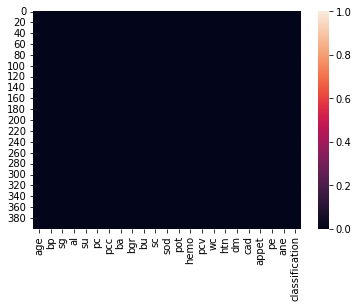

In [ ]:
sns.heatmap(kidney_data.isnull())

In [ ]:
kidney_data.shape

(400, 23)

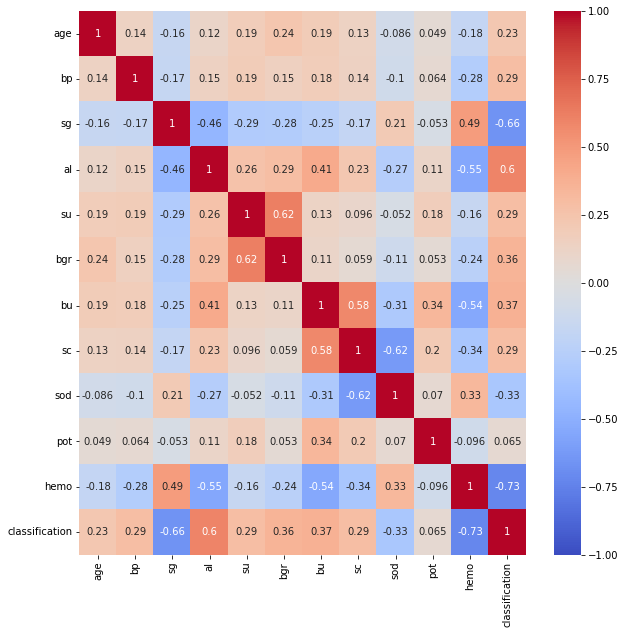

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(kidney_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
kidney_data.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,15.4,44,7800,yes,yes,no,good,no,no,1.0
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,99.0,18.0,...,11.3,38,6000,no,no,no,good,no,no,1.0
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,9.6,31,7500,no,yes,no,poor,no,yes,1.0
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,11.2,32,6700,yes,no,no,poor,yes,yes,1.0
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,11.6,35,7300,no,no,no,good,no,no,1.0


In [ ]:
kidney_data['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [ ]:
kidney_data['cad'].value_counts()

no      364
yes      34
\tno      2
Name: cad, dtype: int64

In [ ]:
kidney_data['cad'] = kidney_data['cad'].replace(to_replace={'\tno':'no'})

In [ ]:
kidney_data['cad'].value_counts()

no     366
yes     34
Name: cad, dtype: int64

In [ ]:
kidney_data['dm'].value_counts()

no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [ ]:
kidney_data['dm'] = kidney_data['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})

In [ ]:
kidney_data['pcv'] = pd.to_numeric(kidney_data['pcv'],errors='coerce')

In [ ]:
kidney_data['wc'] = pd.to_numeric(kidney_data['wc'],errors='coerce')

In [ ]:
kidney_data['pcv'].dtypes

dtype('float64')

In [ ]:
dummy_pc = pd.get_dummies(kidney_data['pc'] , drop_first =True)
dummy_pcc = pd.get_dummies(kidney_data['pcc'] , drop_first = True)
dummy_ba = pd.get_dummies(kidney_data['ba'] , drop_first =True)
dummy_htn = pd.get_dummies(kidney_data['htn'] , drop_first =True)
dummy_dm = pd.get_dummies(kidney_data['dm'] , drop_first =True)
dummy_cad = pd.get_dummies(kidney_data['cad'] , drop_first =True)
dummy_appet = pd.get_dummies(kidney_data['appet'] , drop_first =True)
dummy_pe = pd.get_dummies(kidney_data['pe'] , drop_first =True)
dummy_ane = pd.get_dummies(kidney_data['ane'] , drop_first =True)


In [ ]:
dummy_ane

,yes
0,0
1,0
2,1
3,1
4,0
...,...
395,0
396,0
397,0
398,0


In [ ]:
dummy_pc.rename(columns={"normal":"dummy_pc_normal"},inplace=True)

In [ ]:
dummy_pcc.rename(columns={"present":"dummy_pcc_present"},inplace=True)
dummy_ba.rename(columns={"present":"dummy_pc_present"},inplace=True)
dummy_htn.rename(columns={"yes":"dummy_htn_yes"},inplace=True)
dummy_dm.rename(columns={"yes":"dummy_dm_yes"},inplace=True)
dummy_cad.rename(columns={"yes":"dummy_cad_yes"},inplace=True)
dummy_appet.rename(columns={"poor":"dummy_appet_poor"},inplace=True)
dummy_pe.rename(columns={"yes":"dummy_pe_yes"},inplace=True)
dummy_ane.rename(columns={"yes":"dummy_anne_yes"},inplace=True)
dummy_pc.rename(columns={"normal":"dummy_pc_normal"},inplace=True)

In [ ]:
kidney_data

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,15.4,44.0,7800.0,yes,yes,no,good,no,no,1.0
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,99.0,18.0,...,11.3,38.0,6000.0,no,no,no,good,no,no,1.0
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,9.6,31.0,7500.0,no,yes,no,poor,no,yes,1.0
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,11.2,32.0,6700.0,yes,no,no,poor,yes,yes,1.0
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,11.6,35.0,7300.0,no,no,no,good,no,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,...,15.7,47.0,6700.0,no,no,no,good,no,no,0.0
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,...,16.5,54.0,7800.0,no,no,no,good,no,no,0.0
397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,...,15.8,49.0,6600.0,no,no,no,good,no,no,0.0
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,...,14.2,51.0,7200.0,no,no,no,good,no,no,0.0


In [ ]:
kidney_data.drop(['pc','pcc','ba','htn','dm','cad','appet','pe','ane'] , axis=1 , inplace=True)

In [ ]:
kidney_data = pd.concat([kidney_data , dummy_pc , dummy_pcc , dummy_ba , dummy_htn , dummy_dm , dummy_cad , dummy_appet , dummy_pe , dummy_ane] , axis = 'columns')

In [ ]:
kidney_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'classification', 'dummy_pc_normal', 'dummy_pcc_present',
       'dummy_pc_present', 'dummy_htn_yes', 'dummy_dm_yes', 'dummy_cad_yes',
       'dummy_appet_poor', 'dummy_pe_yes', 'dummy_anne_yes'],
      dtype='object')

In [ ]:
kidney_data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,classification,dummy_pc_normal,dummy_pcc_present,dummy_pc_present,dummy_htn_yes,dummy_dm_yes,dummy_cad_yes,dummy_appet_poor,dummy_pe_yes,dummy_anne_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1.0,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,138.0,4.4,...,1.0,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1.0,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1.0,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1.0,1,0,0,0,0,0,0,0,0


In [ ]:
len(kidney_data.columns)

23

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'dummy_pc_normal', 'dummy_pcc_present',
       'dummy_pc_present', 'dummy_htn_yes', 'dummy_dm_yes', 'dummy_cad_yes',
       'dummy_appet_poor', 'dummy_pe_yes', 'dummy_anne_yes']
kidney_data[columns] = sc.fit_transform(kidney_data[columns])

In [ ]:
Y = kidney_data['classification']
X = kidney_data.drop(['classification'] , axis=1) 

In [ ]:
X['pcv']= X['pcv'].fillna(X['pcv'].mean())
X['wc']= X['wc'].fillna(X['wc'].mean())

In [ ]:
len(X.columns)

22

In [ ]:
# X.drop(['dummy_anne_yes'] ,axis=1 , inplace =True)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.25 , random_state =42)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

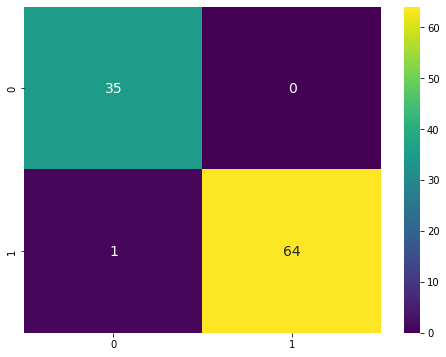

In [ ]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(8,6))
cfs_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifierrandom = RandomForestClassifier(n_estimators=20)
classifierrandom.fit(x_train, y_train.ravel())

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = classifierrandom.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifierrandom.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[35  0]
 [ 0 65]]


In [ ]:
y_pred = classifierrandom.predict(x_test)

In [ ]:
y_pred

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()

In [ ]:
params = {
    'max_depth' :[3,4,5,6,7,8,9,10],
    'learning_rate':[0.05 , 0.10 , 0.15 , 0.20 , 0.25 , 0.30],
    'n_estimators':[100,500,800],
    'gamma':[0.1,0.2,0.3,0.4],
    'min_child_weight':[1,2,3,4],
    'colsample_bytree' :[0.3,0.4,0.5,0.6],}
    

In [ ]:
random_search = RandomizedSearchCV(classifier , param_distributions=params , n_iter=5 , n_jobs=-1, verbose=3 , cv =5 , scoring = 'roc_auc')

In [ ]:
random_search.fit(x_train , y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    8.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.1s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train,cv=10)
score

array([0.96666667, 1.        , 0.96666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.93333333, 1.        ])

In [ ]:
score.mean()

0.9866666666666667

In [ ]:
classifier = classifier.fit(x_train , y_train.ravel())

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
import pickle
filename = 'kidney-prediction-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
model = pickle.load(open("kidney-prediction-model.pkl", "rb"))

In [ ]:
cols_when_model_builds = model.get_booster().feature_names

In [ ]:
kidney_data = kidney_data[cols_when_model_builds]


In [ ]:
kidney_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'dummy_pc_normal', 'dummy_pcc_present', 'dummy_pc_present',
       'dummy_htn_yes', 'dummy_dm_yes', 'dummy_cad_yes', 'dummy_appet_poor',
       'dummy_pe_yes', 'dummy_anne_yes'],
      dtype='object')

In [ ]:
cols_when_model_builds

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'dummy_pc_normal',
 'dummy_pcc_present',
 'dummy_pc_present',
 'dummy_htn_yes',
 'dummy_dm_yes',
 'dummy_cad_yes',
 'dummy_appet_poor',
 'dummy_pe_yes',
 'dummy_anne_yes']

In [ ]:
x_test = x_test[x_train.columns]

In [ ]:
x_test.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'dummy_pc_normal', 'dummy_pcc_present', 'dummy_pc_present',
       'dummy_htn_yes', 'dummy_dm_yes', 'dummy_cad_yes', 'dummy_appet_poor',
       'dummy_pe_yes', 'dummy_anne_yes'],
      dtype='object')